## Air Pollution is Rising!
## Predicting Pollution Levels using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset

train = pd.read_csv('train.csv').values
X = train[:, :-1]
Y = train[:, -1:]
xt = pd.read_csv('test.csv').values

print(X.shape, Y.shape, xt.shape)

# Normalise dataset

u = X.mean(axis = 0)
s = X.std(axis = 0)
X = (X-u)/s
xt = (xt-u)/s

(1600, 5) (1600, 1) (400, 5)


In [3]:
# Add column of 1's for bias

X = np.hstack((np.ones((X.shape[0], 1)), X))
xt = np.hstack((np.ones((xt.shape[0], 1)), xt))

In [4]:
# Algorithm

def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient(X, Y, theta):
    H = hypothesis(X, theta)
    grad = np.dot(X.T, (H - Y))
    return grad/X.shape[0]

def loss(X, Y, theta):
    H = hypothesis(X, theta)
    error = (H - Y)**2
    return error.mean()

def gradientDescent(X, Y, max_itr = 100):
    lr = 0.1
    error_list = []
    theta = np.zeros((X.shape[1], 1))
    for i in range(max_itr):
        grad = gradient(X, Y, theta)
        theta = theta - lr*grad
        error_list.append(loss(X, Y, theta))
        
    return theta, error_list

[[ 0.31882692]
 [29.59234868]
 [94.64766952]
 [ 8.37318663]
 [45.52116937]
 [ 2.46359567]]


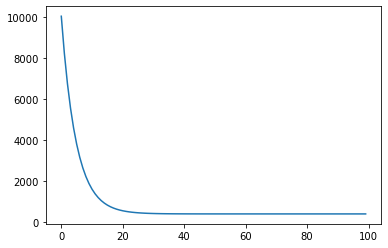

In [5]:
# Training dataset

theta, error_list = gradientDescent(X, Y)

print(theta)

plt.plot(error_list)
plt.show()

In [6]:
# Make Predictons
y_pred = hypothesis(X, theta)

# Computing R2 score
def r2_score(y, y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1- num/denom)
    return score*100

print('score', r2_score(Y, y_pred))

score 96.60939654502222


In [7]:
# Predictions on testing data

yt = hypothesis(xt, theta)
df = pd.DataFrame(yt, columns = ['target'])
df.to_csv('pred.csv', index_label='Id')